In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('/content/KDDTrain+.csv')
test_df = pd.read_csv('/content/KDDTest+.csv')

In [3]:
train_df.head()
test_df.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.22,0.23,0.24,0.25,1.2,1.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21.0
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21.0
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15.0
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11.0
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21.0


In [4]:
train_df.shape
test_df.shape

(8952, 43)

In [5]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9036 entries, 0 to 9035
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0         9036 non-null   int64  
 1   tcp       9036 non-null   object 
 2   ftp_data  9036 non-null   object 
 3   SF        9036 non-null   object 
 4   491       9036 non-null   int64  
 5   0.1       9036 non-null   int64  
 6   0.2       9036 non-null   int64  
 7   0.3       9036 non-null   int64  
 8   0.4       9036 non-null   int64  
 9   0.5       9036 non-null   int64  
 10  0.6       9036 non-null   int64  
 11  0.7       9036 non-null   int64  
 12  0.8       9036 non-null   int64  
 13  0.9       9036 non-null   int64  
 14  0.10      9036 non-null   int64  
 15  0.11      9036 non-null   int64  
 16  0.12      9036 non-null   int64  
 17  0.13      9036 non-null   int64  
 18  0.14      9036 non-null   int64  
 19  0.15      9036 non-null   int64  
 20  0.16      9035 non-null   floa

In [6]:
train_df.isnull().sum()
test_df.isnull().sum()

,0
0,0
tcp,0
private,0
REJ,0
0.1,0
0.2,0
0.3,0
0.4,0
0.5,0
0.6,0


In [ ]:
train_df.columns
test_df.columns

Index(['0', 'tcp', 'private', 'REJ', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14', '0.15',
       '0.16', '0.17', '0.18', '229', '10', '0.19', '0.20', '1', '1.1', '0.04',
       '0.06', '0.21', '255', '10.1', '0.04.1', '0.06.1', '0.22', '0.23',
       '0.24', '0.25', '1.2', '1.3', 'neptune', '21'],
      dtype='object')

In [7]:
column_names = [
    'duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment',
    'urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
    'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds',
    'is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
    'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
    'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
    'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','label','difficulty'
]

In [8]:
df = pd.read_csv('KDDTrain+.csv', names=column_names)
df.drop('difficulty', axis=1, inplace=True)

In [9]:
# Step 4: Encode Labels
le = LabelEncoder()
df['protocol_type'] = le.fit_transform(df['protocol_type'])
df['service'] = le.fit_transform(df['service'])
df['flag'] = le.fit_transform(df['flag'])
df['label'] = le.fit_transform(df['label'])  # normal = 11, attack types = other values


In [10]:
# Step 5: Split Data
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:
# Step 7: Accuracy & Confusion Matrix
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.9981897722130034


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


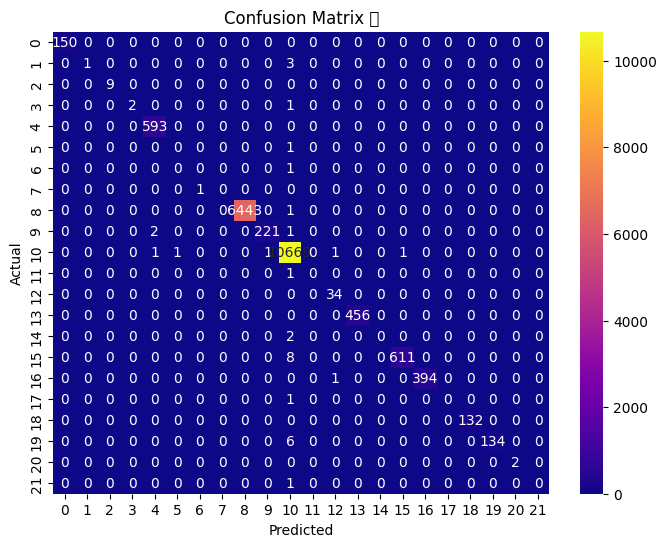

In [13]:
# Step 8: Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='plasma')
plt.title("Confusion Matrix 🔥")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
